In [1]:
import pandas as pd
# pandas is a powerfull library used for data visualization and data manipulation
import numpy as np
# used for numerical computations and scientific calculations
import matplotlib.pyplot as plt
# matplotlib provides plotting tools for visualization
import seaborn as sns
# provides a hight-Level for creating attractive and informative satistical graphics 
from sklearn.model_selection import train_test_split
# train test split is used for training and testing the model 
from sklearn.preprocessing import LabelEncoder,StandardScaler
# Label Encoder is used for converting the  categorical value into numerical value
# StandardScaler is a data scaling technique(Standard_scaling)
from sklearn import metrics
# metrics are quantitative measures used to evaluate the performance of a model
from sklearn.svm import SVC
# importing Support Vector Classification algorithm
from xgboost import XGBRegressor
# importing XGB(extreme gradient boosting) regressoor algorithm 
from sklearn.linear_model import LinearRegression,Lasso,Ridge
# importing LinearRegression ,Lasso and Ridge algoritms
from sklearn.ensemble import RandomForestRegressor
# importing the random forest algoritm

In [2]:
df=pd.read_csv("calories.csv")
# importing and reading the Calorie csv file
df.head()
# printing the head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [3]:
df.shape
# the shape prints the total number of rows and columns
# i.e 15000 rows and 9 columns

(15000, 9)

In [4]:
df.info()
# 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()
# statistical measures of data is printed using the describe function

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [6]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

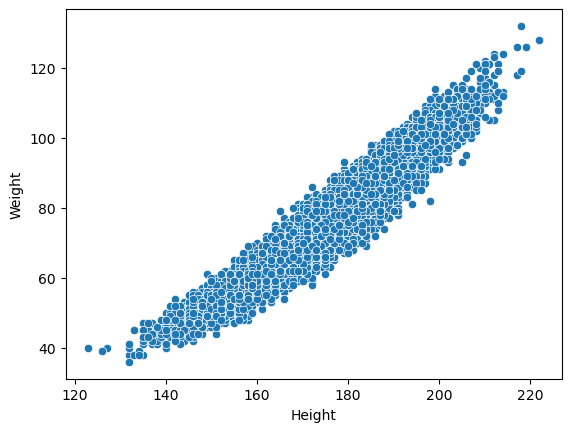

In [7]:
sns.scatterplot(x='Height',y='Weight',data=df)
# plotting a scatterplot which is used to show the relationship using
# the height and weight columns 
plt.show()

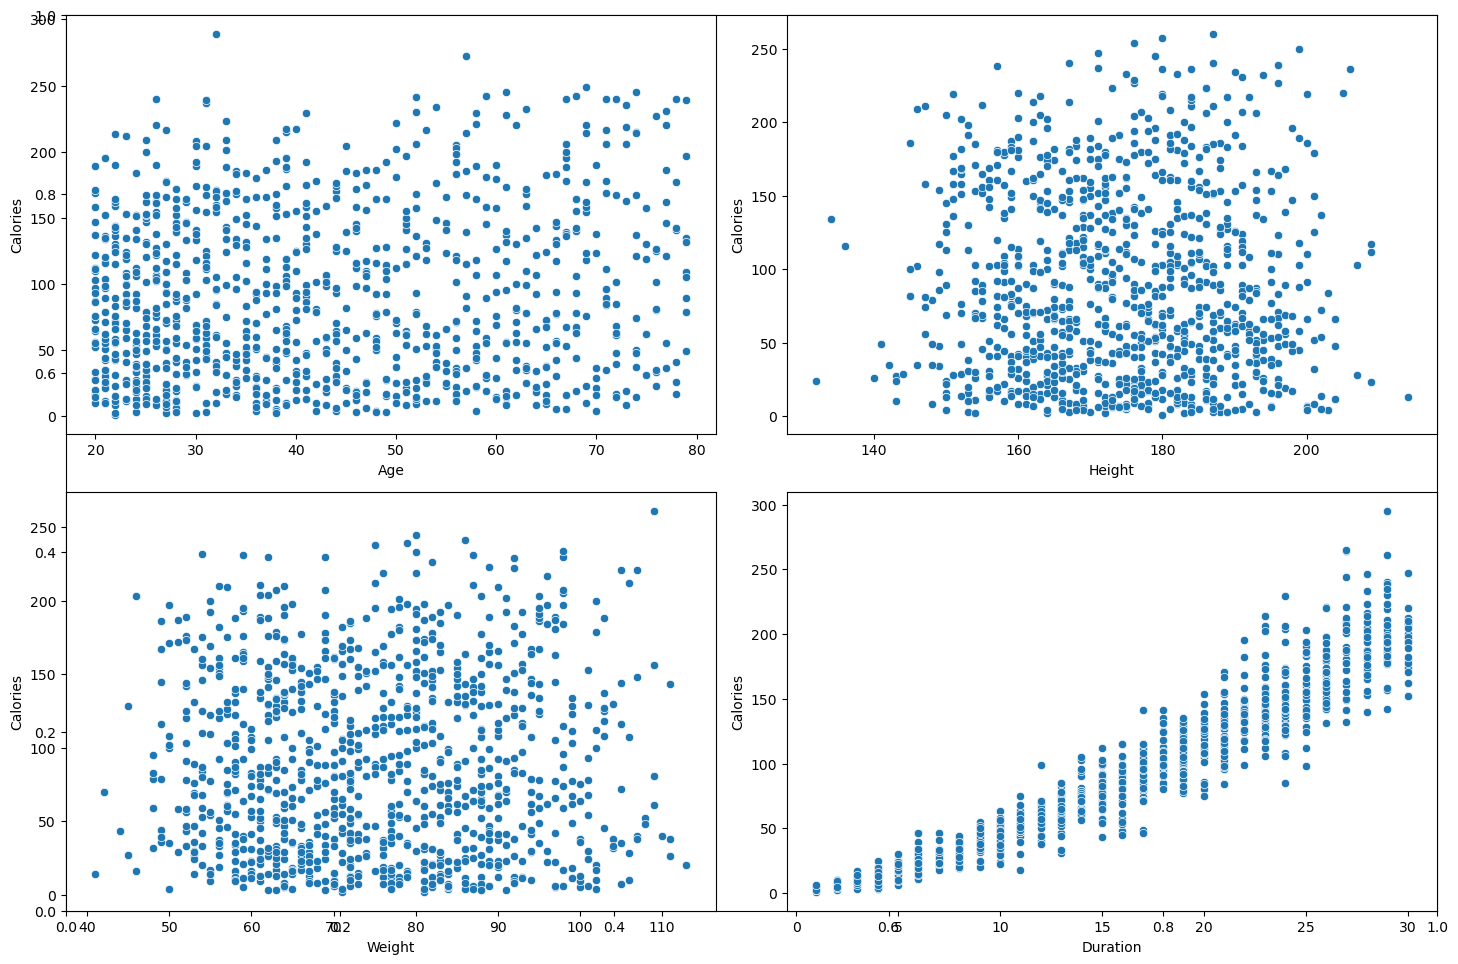

In [8]:
features=[ 'Age', 'Height', 'Weight', 'Duration']
# all the Columns that could be used as a features are stores in features variable
plt.subplots(figsize=(15,10))
# plotting a subplots where the total plot size in which the sub plots  are plotted are given
# within the figure
for i,col in enumerate(features):
#i=0,col in enumerate takes the 1st column in features i.e Age and after executing the rest of the code it takes the next column "height" and goes on
    plt.subplot(2,2,i+1)
# subplot is plotted with 2 rows and 2 columns
# i=0,hence 0+1=1,At the 1st subplot the Age plots  
    x=df.sample(1000)
# out of all the sample data its limited ti 1000
    sns.scatterplot(x=col,y='Calories',data=x)
# scatter plot is plotted with x col i.e Age and y as calories and relationship are known
plt.tight_layout()
plt.show()

C:\Users\binuk\AppData\Local\Temp\ipykernel_22396\2174609139.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\binuk\AppData\Local\Temp\ipykernel_22396\2174609139.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\binuk\AppData\Local\Temp\ipykernel_22396\21

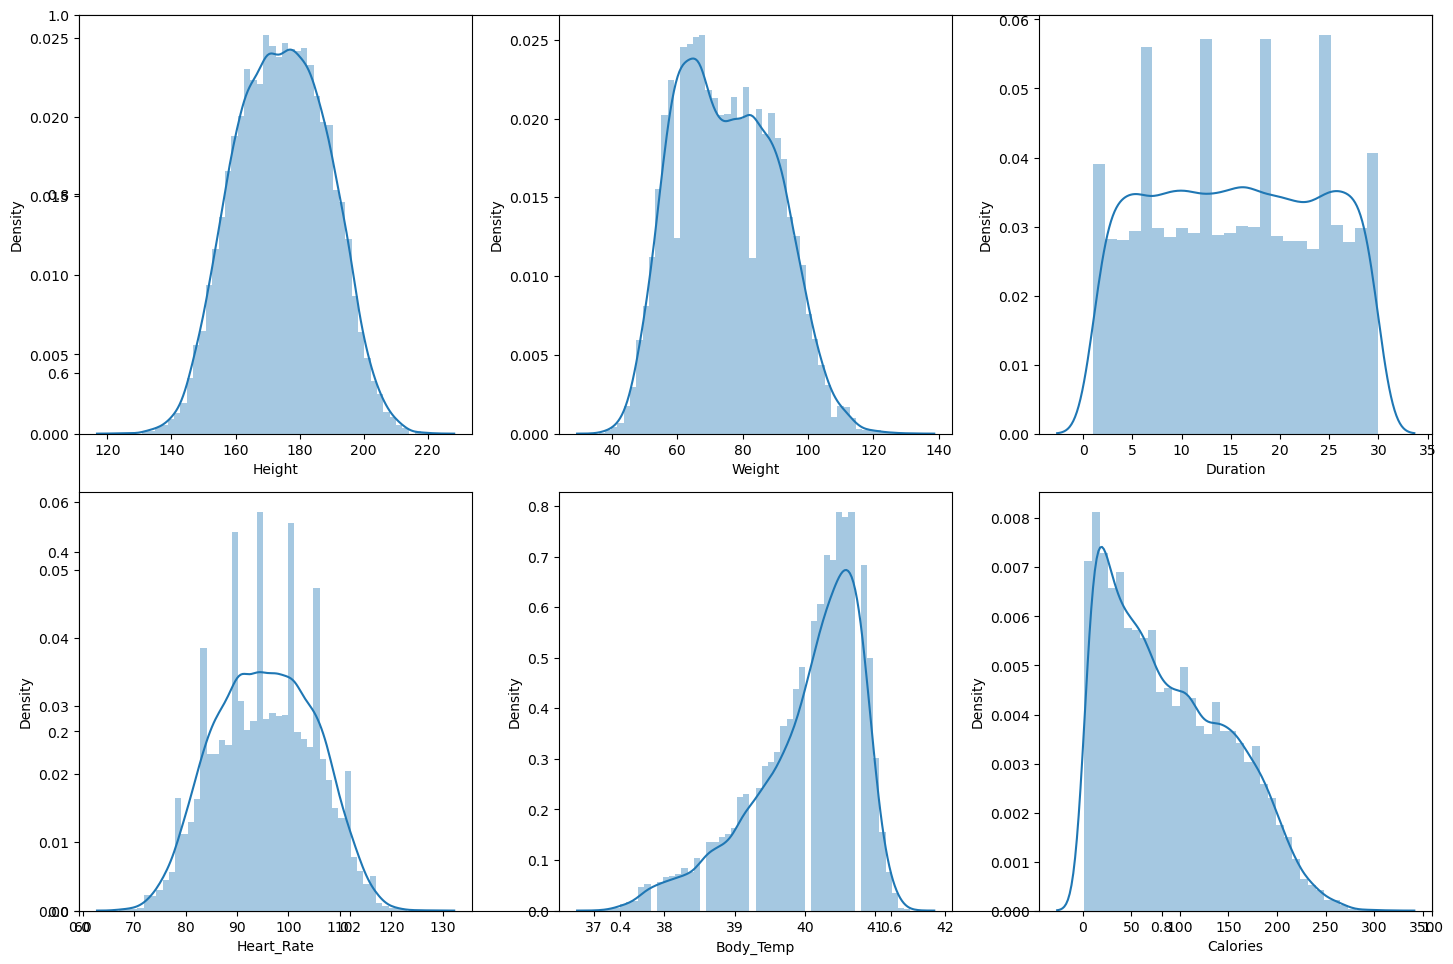

In [23]:
features = df.select_dtypes(include='float').columns
# selecting the only float datatypes within the features 
plt.subplots(figsize=(15,10))
# plotting a subplot with figsize=15,10
for i,col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.distplot(df[col])
# plotting a distplt of all the column one by one which are float type
plt.tight_layout()
plt.show()

In [25]:
df.replace({'male':0,'female':1},inplace=True)
# replace the male to a numerical variable 0 and female to 1
df.head()

C:\Users\binuk\AppData\Local\Temp\ipykernel_22396\3408040289.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'male':0,'female':1},inplace=True)


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


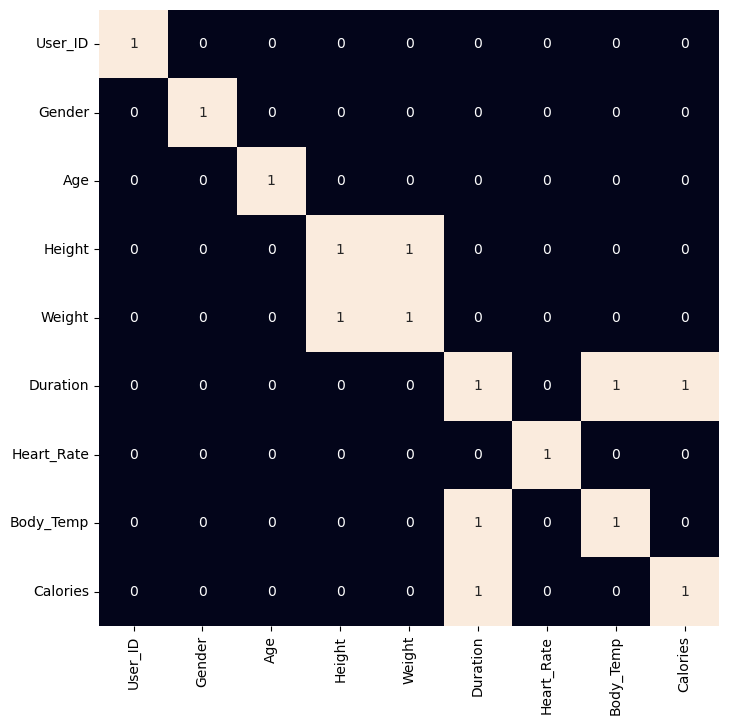

In [35]:
plt.figure(figsize=(8,8))
# allocating the figure size
sns.heatmap(df.corr()>0.9,annot=True,cbar=False)
# plotting a heatmap 
plt.show()

In [37]:
to_remove=['Weight','Duration']
# dropping weight and duration column as its co-related to the target column "Calories"
df.drop(to_remove,axis=1,inplace=True)

In [45]:
features=df.drop(['User_ID','Calories'],axis=1)
# dropping Userid,Calories
target =df['Calories'].values
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.1,random_state=22)
X_train.shape,X_test.shape

((13500, 5), (1500, 5))

In [47]:
scaler=StandardScaler()
# Normalizing the features for stable and fast training
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)

In [49]:
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), XGBRegressor(),
          Lasso(), RandomForestRegressor(), Ridge()]

for i in range(5):
    models[i].fit(X_train, Y_train)
    print(f'{models[i]} : ')
    train_preds = models[i].predict(X_train)
    print('Training Error : ', mae(Y_train, train_preds))
    val_preds = models[i].predict(X_val)
    print('Validation Error : ', mae(Y_val, val_preds))
    
    print()


LinearRegression() : 
Training Error :  17.893463692619434
Validation Error :  18.007896272831253

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Error :  7.89463304294701
Validation Error :  10.12050432946533

Lasso() : 
Training Error :  17.915089584958036
Validation Error :  17.995033